In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [4]:
img = cv.imread('messi.jpg', cv.IMREAD_GRAYSCALE)
if img is None:
    print("file could not be read, check with os.path.exists()")
img2 = img.copy()
# type(img2)
# img.shape
# cv.imshow("Image",img)
# cv.waitKey(0)
# cv.destroyAllWindows()

In [3]:
template = cv.imread('messi_face.jpg', cv.IMREAD_GRAYSCALE)
if template is None:
    print("file could not be read, check with os.path.exists()")
w, h = template.shape[::-1]
template.shape

(123, 111)

### Converting the image to grayscale can lead to better result
1. Reduced the computational complexity: Color images will have 3 channels (RGB) or maybe 4 channels (RGB-alpha) for each pixel, while grayscale only have one => Processing a grayscale image requires less computation than color image. (even better if we are dealing with real-time matching)
2. Increase focus on shape and texture: Color variations can distract from the underlying shape and texture of an object => Harder to find a good match.
3. Improve noise tolerance: Noise affects each channels of the color image differently, grayscale conversion can help to reduce the impact of noise by averaging the values across all color channels.

In [4]:
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR', 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

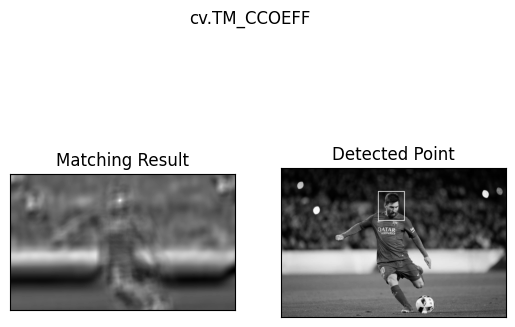

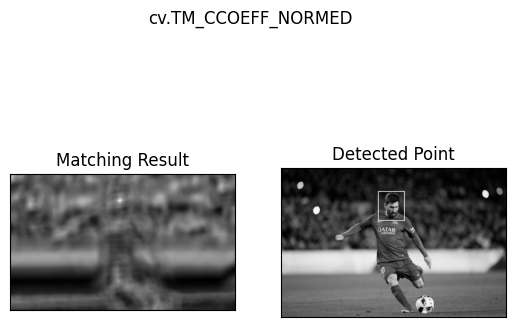

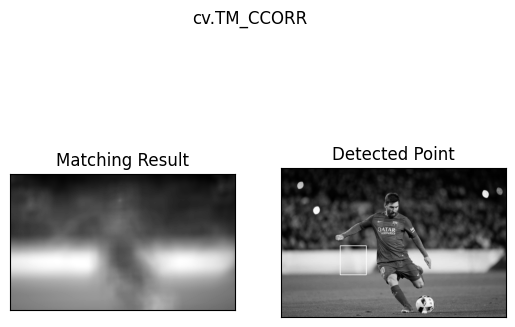

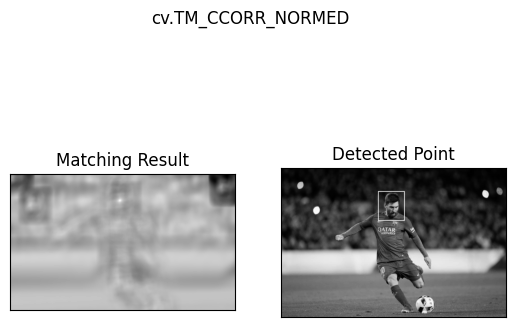

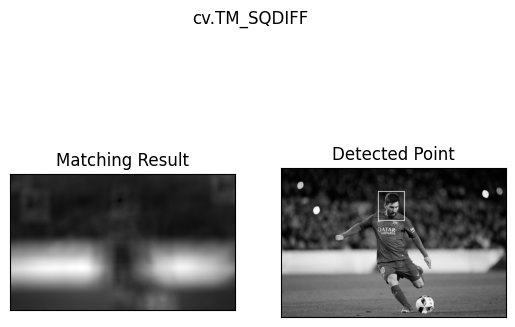

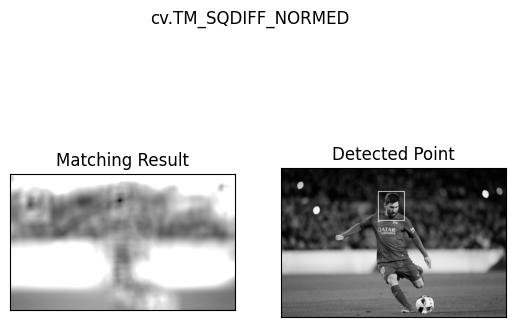

In [5]:
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()